array([[  18.03896714, 3689.78873239],
       [  15.65163934, 5115.98360656]])

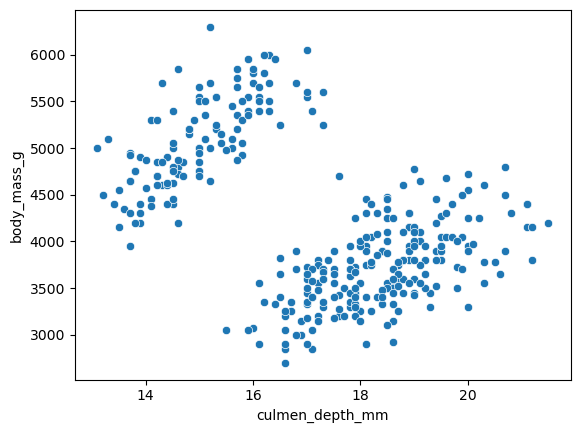

In [24]:
import bs4 as bs
#import random
import pandas as pd
import seaborn as sb
import numpy as np
#import datetime
import requests as rq
import pickle
import math
#import json
#import time
#from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def save_pickle(file, value):
    pickle.dump(value, open(file, "wb"))
def load_pickle(file):
    return pickle.load(open(file, "rb"))

data = pd.read_csv("penguins.csv")

data.dropna(inplace=True)

sb.scatterplot(data=data, x='culmen_depth_mm', y='body_mass_g')


train_df, _ = train_test_split(data, test_size=0.3, random_state=42)
train_df = train_df[["culmen_depth_mm", "body_mass_g"]]
train_df.head()

model = KMeans(n_clusters=2)
model.fit(data[["culmen_depth_mm", "body_mass_g"]])
model.cluster_centers_

<Axes: xlabel='Clusters', ylabel='Inerta'>

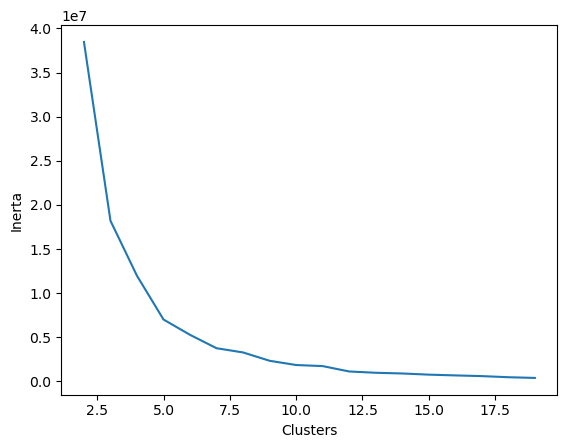

In [25]:
# Elbow Plot
plot = {
    "Clusters": range(2,20),
    "Inerta": []
}

for k in range(2,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_df)
    plot['Inerta'].append(kmeans.inertia_)

sb.lineplot(data=plot, x="Clusters", y="Inerta")

<Axes: xlabel='culmen_depth_mm', ylabel='body_mass_g'>

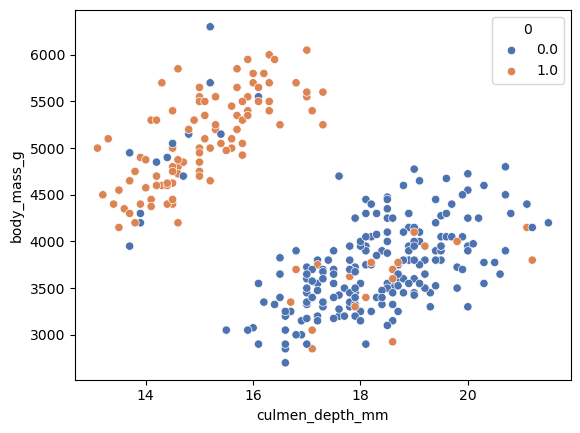

In [26]:
lbl = model.labels_

newData = pd.merge(data, pd.DataFrame(model.labels_), how="left", right_index=True, left_index=True)
sb.scatterplot(data=newData, x="culmen_depth_mm", y="body_mass_g", hue=0, palette="deep")

<Axes: xlabel='Clusters', ylabel='Inerta'>

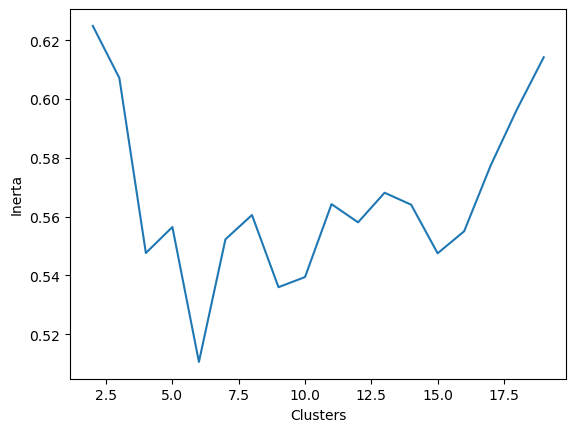

In [27]:
plot = {
    "Clusters": range(2,20),
    "Inerta": []
}

for k in range(2,20):
    kmeans = KMeans(n_clusters=k ,max_iter=1000)
    labels = kmeans.fit_predict(train_df)
    plot['Inerta'].append(silhouette_score(train_df, labels))

sb.lineplot(data=plot, x="Clusters", y="Inerta")